---
# Dataset Analysis

| Name | Student ID |
|------|------------|
| Joao Parreira | 2221985 | 
| Pedro Barbeiro | 2221986 |
- ((2221985 + 2221986) % 5) + 1 = 2  
- **Validation set: train2**. 

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image

train_dirs = ['../data/train1', '../data/train3', '../data/train4', '../data/train5']
validation_dir = '../data/train2'
test_dir = '../data/test'

def count_images_in_categories(directory):
    categories = os.listdir(directory)
    category_counts = {}
    total_count = 0
    for category in categories:
        count = len(os.listdir(os.path.join(directory, category)))
        category_counts[category] = count
        total_count += count
    return category_counts, total_count

train_counts_each_dir = [count_images_in_categories(train_dir)[0] for train_dir in train_dirs]
validation_counts, validation_total_count = count_images_in_categories(validation_dir)
test_counts, test_total_count = count_images_in_categories(test_dir)

train_counts = {category: sum([count.get(category, 0) for count in train_counts_each_dir]) for category in train_counts_each_dir[0]}
train_total_count = sum([sum(count.values()) for count in train_counts_each_dir])

def display_sample_images(directory, num_images=2):
    categories = os.listdir(directory)
    fig, axes = plt.subplots(num_images, len(categories), figsize=(len(categories) * 2, num_images * 2))

    for j, category in enumerate(categories):
        image_files = os.listdir(os.path.join(directory, category))[:num_images]
        for i, image_file in enumerate(image_files):
            img_path = os.path.join(directory, category, image_file)
            img = Image.open(img_path).resize((32, 32))
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if i == 0:
                axes[i, j].set_title(category, fontsize=8)

    plt.tight_layout()
    plt.show()

def plot_statistics(dataset_name, category_counts, total_count, bar_color, pie_colors):
    categories = list(category_counts.keys())
    counts = list(category_counts.values())
    num_categories = len(categories)

    fig, axes = plt.subplots(1, 2, figsize=(24, 6))

    bars = axes[0].barh(range(num_categories), counts, color=bar_color, alpha=1)
    for bar, count in zip(bars, counts):
        axes[0].text(bar.get_width() - 5, bar.get_y() + bar.get_height()/2, str(count), va='center', ha='right', color='white', fontweight='bold')
    axes[0].set_ylabel('Categories')
    axes[0].set_xlabel('Number of Images')
    axes[0].set_yticks(range(num_categories))
    axes[0].set_yticklabels(categories)
    axes[0].set_title(f'Distribution of Images in {dataset_name} Dataset (Total: {total_count})')

    axes[1].pie(counts, labels=categories, colors=pie_colors, autopct='%1.1f%%', startangle=140)
    axes[1].axis('equal')
    axes[1].set_title(f'Category Distribution in {dataset_name} Dataset (Total: {total_count})')

    plt.tight_layout()
    plt.show()

---
# Train Dataset

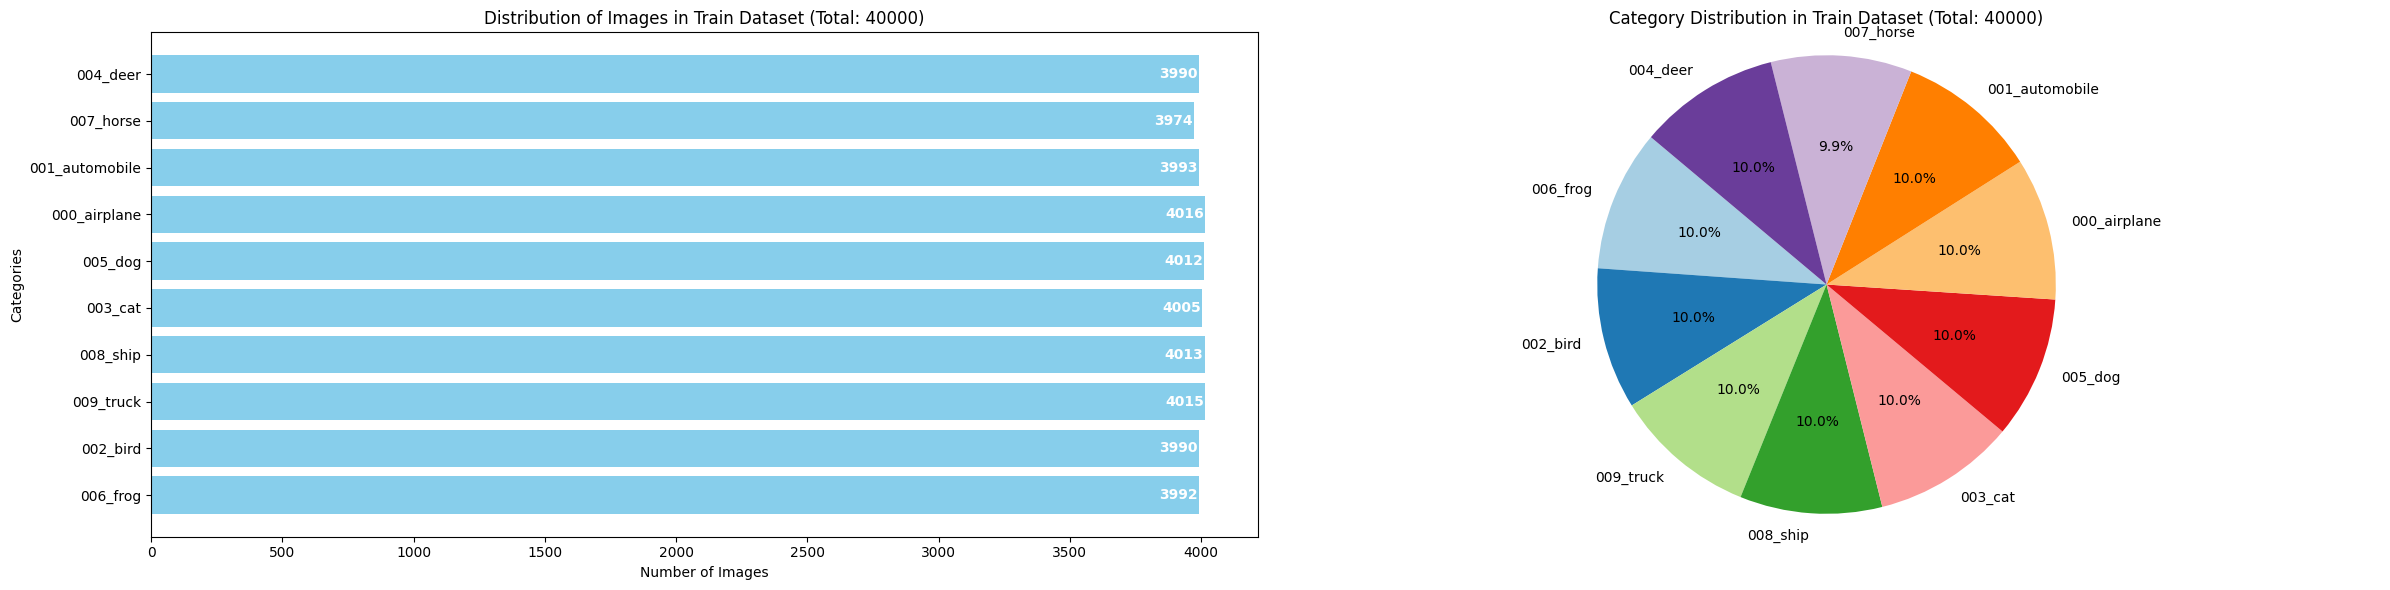

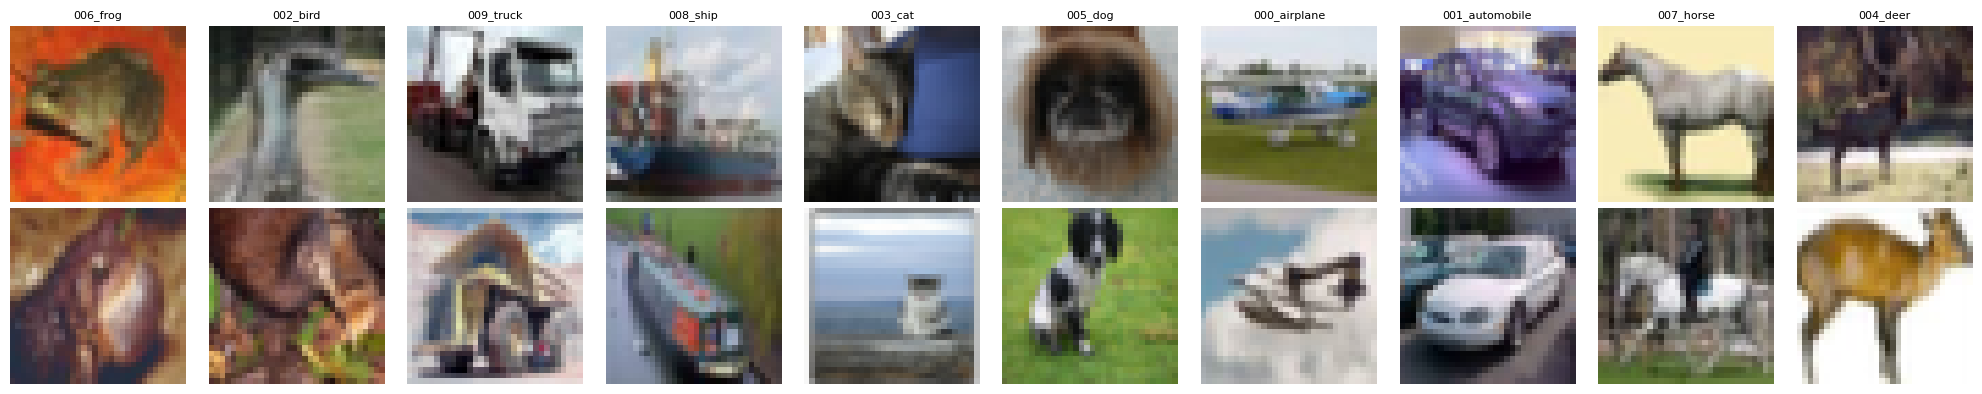

In [9]:
plot_statistics('Train', train_counts, train_total_count, 'skyblue', plt.cm.Paired.colors)
display_sample_images(train_dirs[0])

---
# Validation Dataset

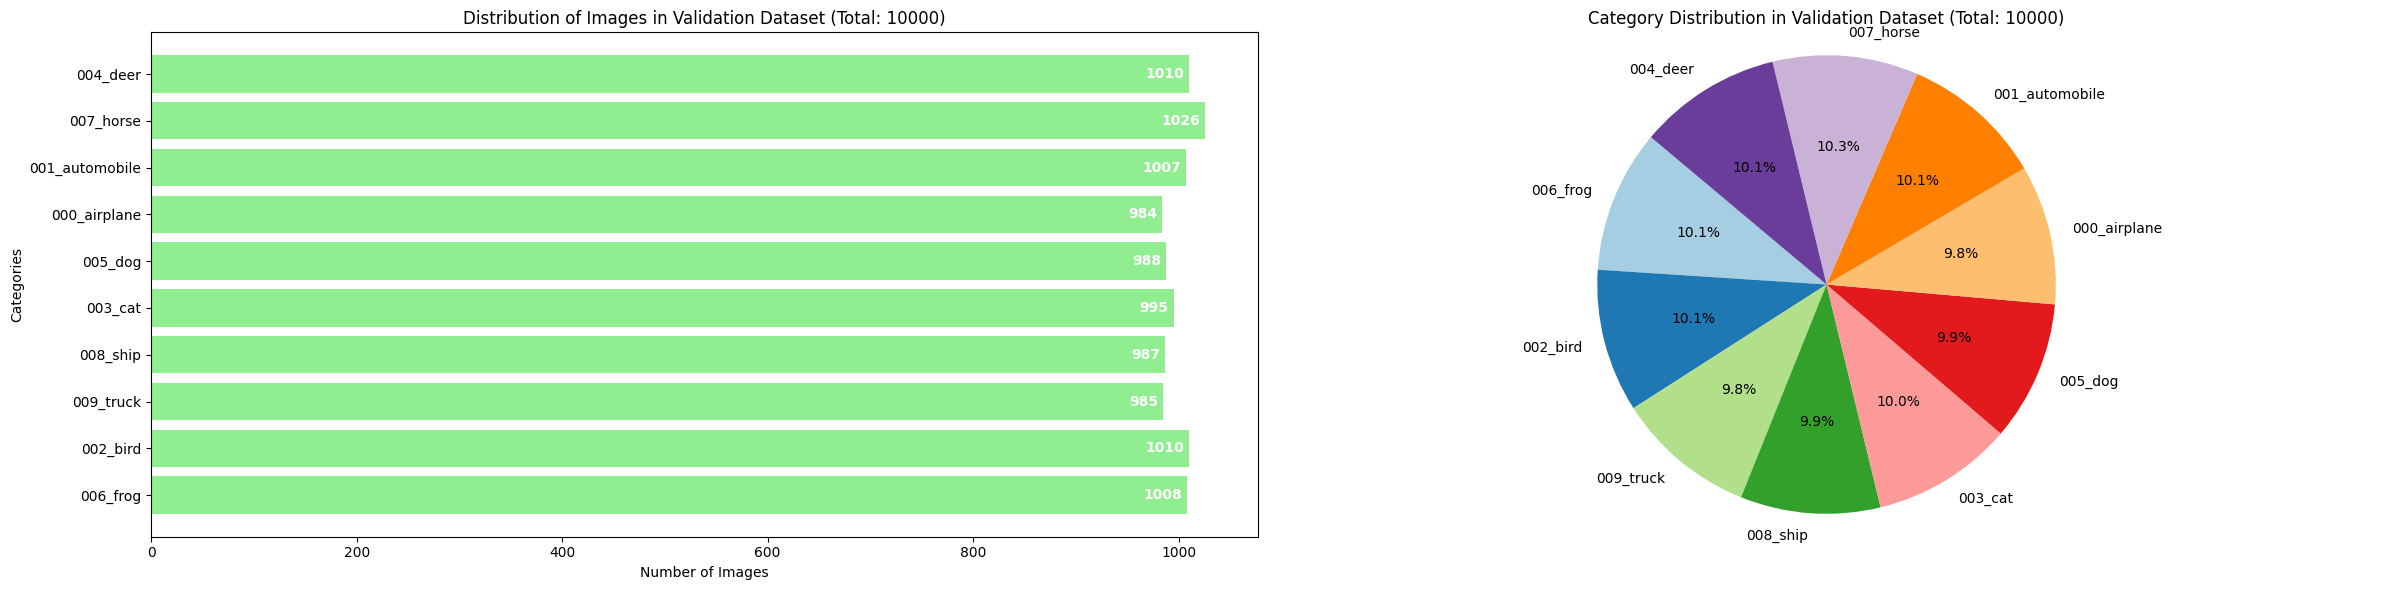

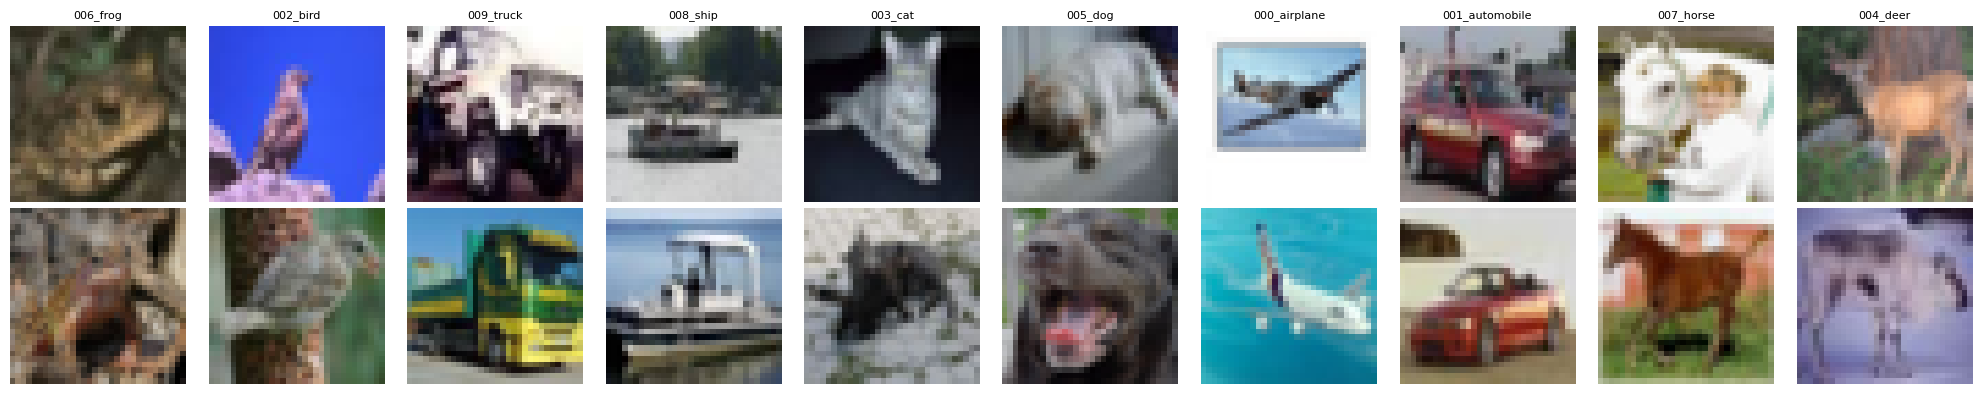

In [10]:
plot_statistics('Validation', validation_counts, validation_total_count, 'lightgreen', plt.cm.Paired.colors)
display_sample_images(validation_dir)

---
# Test Dataset

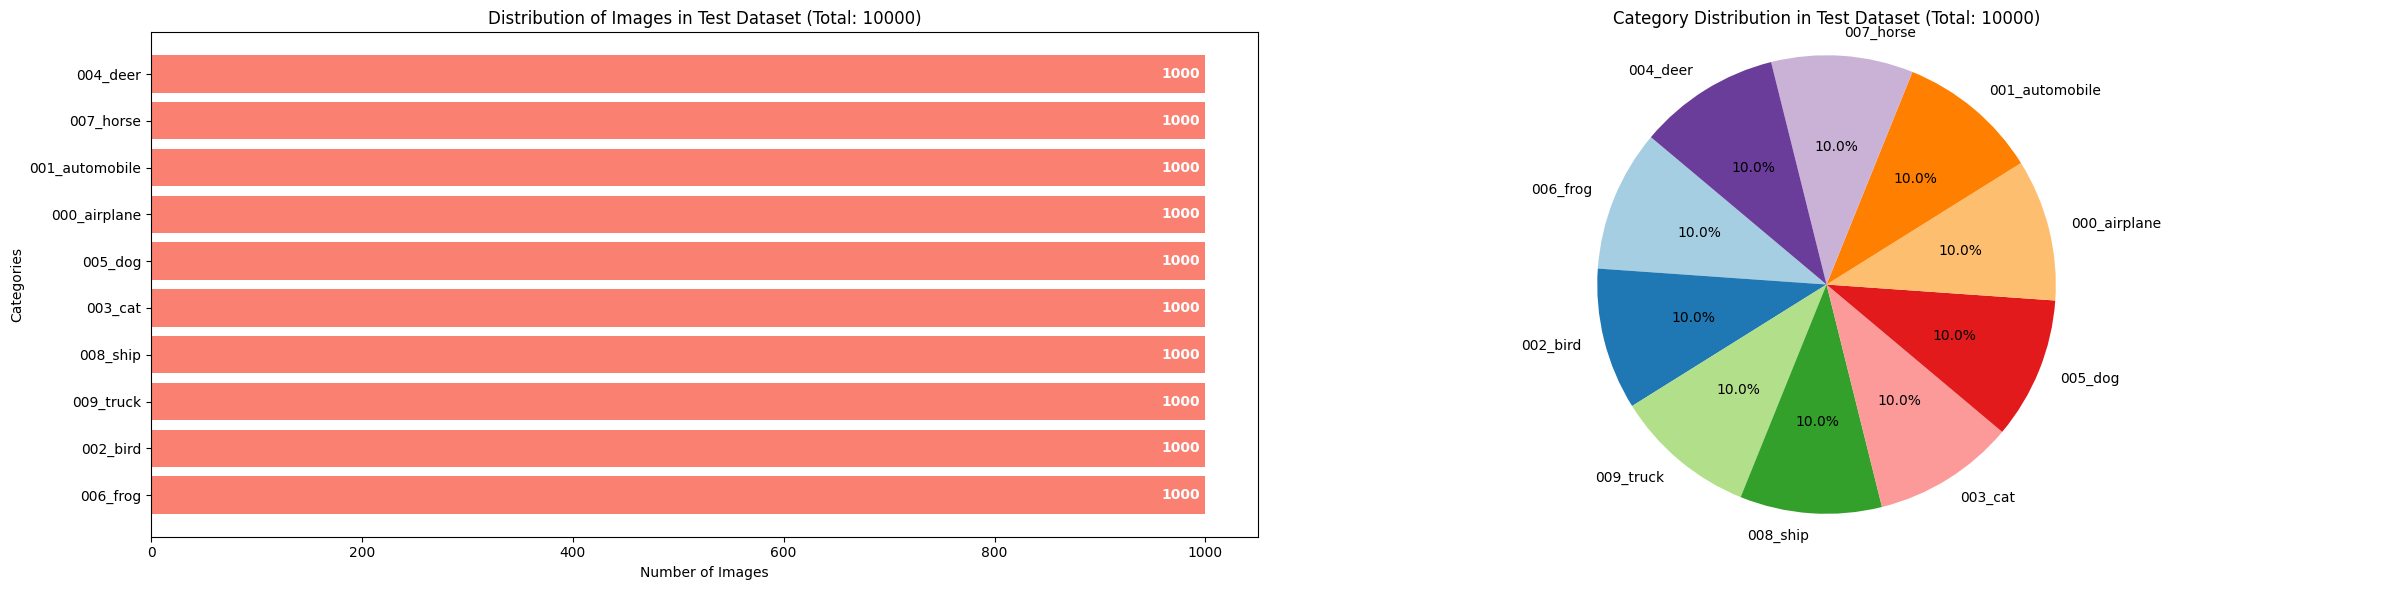

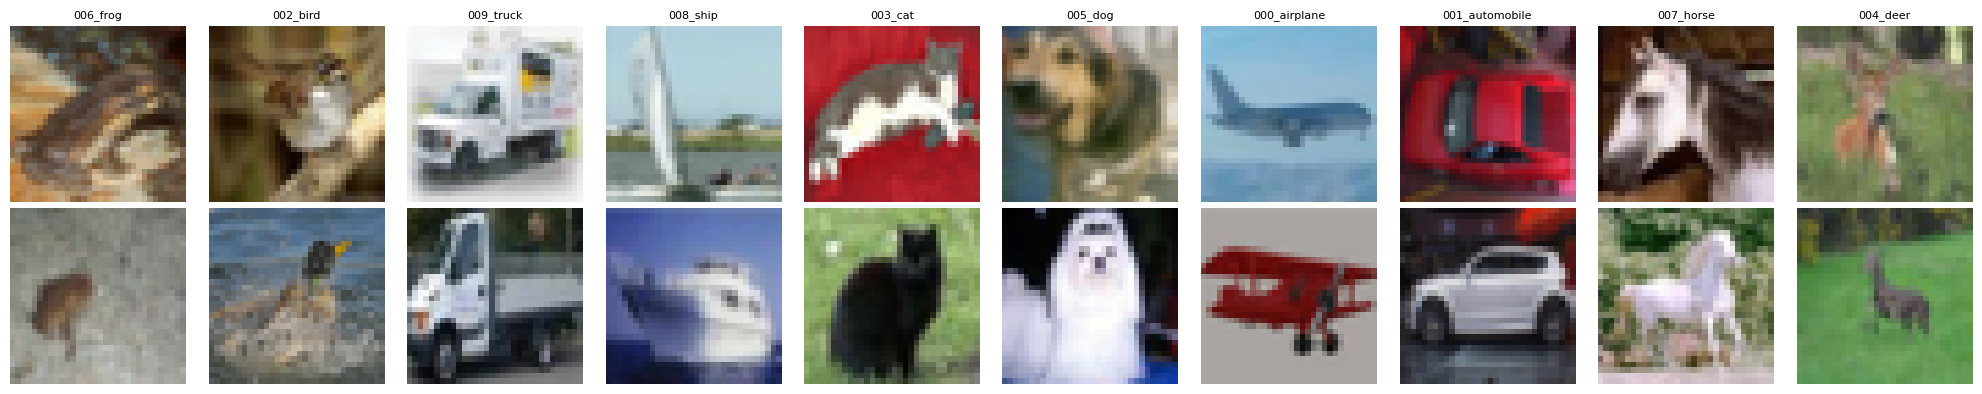

In [11]:
plot_statistics('Test', test_counts, test_total_count, 'salmon', plt.cm.Paired.colors)
display_sample_images(test_dir)

---
# Conclusion
- Looking at the train dataset:
    - The distribution of images in the training set is almost uniform across all categories.
    - The train dataset contains a total of 40000 images distributed across 10 categories.
- Looking at the validation dataset:
    - The distribution of images in the validation set is almost uniform across all categories with slight variations.
    - The validation dataset contains a total of 10000 images distributed across 10 categories.
- Looking at the test dataset:
    - The distribution of images in the test set is completely uniform across all categories.
    - The test dataset contains a total of 10000 images distributed across 10 categories.